<a href="https://colab.research.google.com/github/Nahida-Karaja/Research3/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

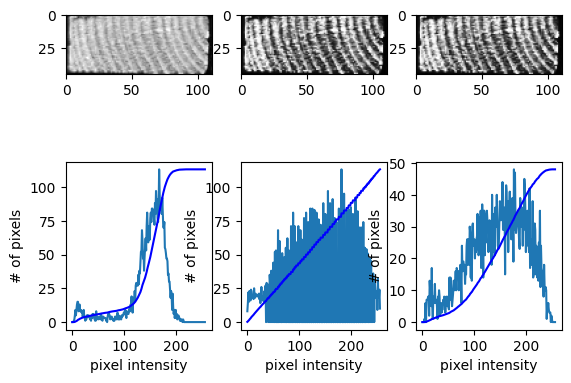

In [ ]:
def histogramEqualization():
    '''
        histogram equalization
        normalizes histogram by stretching out the range of
        values to fill up the full range of values 0-255

        good for images that are too dark or too bright
        to improve contrast

        cdf graph
        linear - means equally distributed
        slow rise, then fast rise - high values more likely
        fast rise, then slow rise - low values more likely

        CLAHE - contrast limiting adaptive equalization
            1. The image is divided into small tiles or blocks.
            2. A histogram is calculated for each tile.
            3. If any histogram bin is above the specified clipLimit, those excess pixels are clipped and the contrast of that tile is limited.
            4. The clipped excess is redistributed uniformly to other bins before applying the histogram equalization.
            5. Histogram equalization is applied to each tile.
            6. The final image is obtained by interpolating the equalized tiles.
    '''
    root = os.getcwd()
    imgPath = os.path.join(root,'/content/drive/MyDrive/dataset/train/class b/2023-04-23_19-00-53.png')
    img = cv.imread(imgPath,cv.IMREAD_GRAYSCALE)
    # img = img[35:507,148:687]
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    cdf = hist.cumsum()
    cdfNorm = cdf * float(hist.max()) / cdf.max()

    plt.figure()
    plt.subplot(231)
    plt.imshow(img,cmap='gray')
    plt.subplot(234)
    plt.plot(hist)
    plt.plot(cdfNorm, color = 'b')
    plt.xlabel("pixel intensity")
    plt.ylabel("# of pixels")

    # Equalize
    equImg = cv.equalizeHist(img)
    equHist = cv.calcHist([equImg], [0], None, [256], [0, 256])
    equCdf = equHist.cumsum()
    equCdfNorm = equCdf * float(equHist.max()) / equCdf.max()
    plt.subplot(232)
    plt.imshow(equImg,cmap='gray')
    plt.subplot(235)
    plt.plot(equHist)
    plt.plot(equCdfNorm, color = 'b')
    plt.xlabel("pixel intensity")
    plt.ylabel("# of pixels")


    #CLAHE
    claheObj = cv.createCLAHE(clipLimit=5,tileGridSize=(8,8))
    claheImg = claheObj.apply(img)
    claheHist = cv.calcHist([claheImg], [0], None, [256], [0, 256])
    claheCdf = claheHist.cumsum()
    claheCdfNorm = claheCdf * float(claheHist.max()) / claheCdf.max()
    plt.subplot(233)
    plt.imshow(equImg,cmap='gray')
    plt.subplot(236)
    plt.plot(claheHist)
    plt.plot(claheCdfNorm, color = 'b')
    plt.xlabel("pixel intensity")
    plt.ylabel("# of pixels")
    plt.show()

if __name__ == '__main__':
    histogramEqualization()
